In [79]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [81]:
#loading and reading data from downlowd path
home_dir = os.path.expanduser("-")
downloads_path = os.path.join(home_dir, "/Users/billonario/Downloads")
file_name = "Border_Crossing_Entry_Data_20250528.csv"
file_path = os.path.join(downloads_path, file_name)
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400908 entries, 0 to 400907
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  400908 non-null  object 
 1   State      400908 non-null  object 
 2   Port Code  400908 non-null  int64  
 3   Border     400908 non-null  object 
 4   Date       400908 non-null  object 
 5   Measure    400908 non-null  object 
 6   Value      400908 non-null  int64  
 7   Latitude   400908 non-null  float64
 8   Longitude  400908 non-null  float64
 9   Point      400908 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.6+ MB


In [83]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


In [85]:
#Convert Date column to actual Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%b %Y')
#Adding new column name Year
df['Year'] = df['Date'].dt.year
#Removing Measures that do not account for real crossing and storing it as filtered_df
filtered_df = df[~df['Measure'].isin(['Rail Containers Empty', 'Rail Containers Loaded', 'Truck Containers Empty','Truck Containers Loaded'])]
#Filtering column Year for 2022 thru 2025
filtered_df = filtered_df[filtered_df['Year'].isin([2022,2023,2024,2025])]

In [87]:
#reviewing column data types
filtered_df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Latitude            float64
Longitude           float64
Point                object
Year                  int32
dtype: object

In [89]:
filtered_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Year
0,Jackman,Maine,104,US-Canada Border,2024-01-01,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661),2024
1,Porthill,Idaho,3308,US-Canada Border,2024-04-01,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861),2024
2,San Luis,Arizona,2608,US-Mexico Border,2024-04-01,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485),2024
3,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972),2024
4,Warroad,Minnesota,3423,US-Canada Border,2024-01-01,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999),2024


<Axes: title={'center': 'Border Crossing 2022 thru 2025'}, xlabel='Total Crossing', ylabel='Measure'>

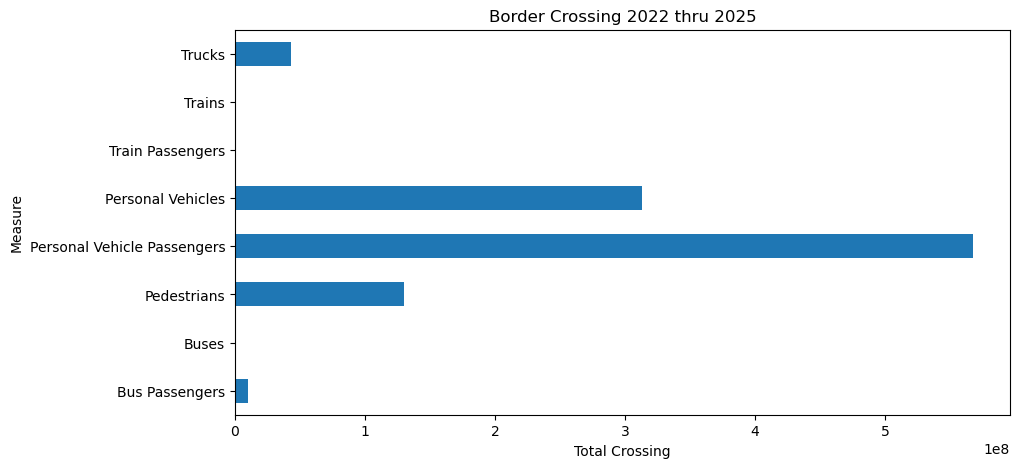

In [91]:
#Plotting Border Crossing for 2022 thru 2025
filtered_df.groupby(['Measure'])['Value'].sum().plot(kind='barh', figsize=(10,5), title='Border Crossing 2022 thru 2025', xlabel='Total Crossing')

In [121]:
By_Measure = filtered_df.groupby(['Measure','Border'])['Value'].sum()
print(By_Measure)

Measure                      Border          
Bus Passengers               US-Canada Border      2720840
                             US-Mexico Border      7171821
Buses                        US-Canada Border       132758
                             US-Mexico Border       381796
Pedestrians                  US-Canada Border       706843
                             US-Mexico Border    129558145
Personal Vehicle Passengers  US-Canada Border    121989536
                             US-Mexico Border    445677628
Personal Vehicles            US-Canada Border     62700123
                             US-Mexico Border    250720686
Train Passengers             US-Canada Border       638399
                             US-Mexico Border        36402
Trains                       US-Canada Border        69603
                             US-Mexico Border        36516
Trucks                       US-Canada Border     18383883
                             US-Mexico Border     24749177
Name: Valu

In [95]:
df

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Year
0,Jackman,Maine,104,US-Canada Border,2024-01-01,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661),2024
1,Porthill,Idaho,3308,US-Canada Border,2024-04-01,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861),2024
2,San Luis,Arizona,2608,US-Mexico Border,2024-04-01,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485),2024
3,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972),2024
4,Warroad,Minnesota,3423,US-Canada Border,2024-01-01,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999),2024
...,...,...,...,...,...,...,...,...,...,...,...
400903,Ogdensburg,New York,701,US-Canada Border,2025-04-01,Personal Vehicle Passengers,22225,44.733,-75.458,POINT (-75.4577501759 44.7330898624),2025
400904,Limestone,Maine,118,US-Canada Border,2025-04-01,Personal Vehicles,658,46.925,-67.790,POINT (-67.789597 46.924555),2025
400905,Van Buren,Maine,108,US-Canada Border,2025-04-01,Personal Vehicle Passengers,7812,47.160,-67.931,POINT (-67.930799 47.159645),2025
400906,Ferry,Washington,3013,US-Canada Border,2025-04-01,Trucks,1,49.000,-118.761,POINT (-118.761166 49.000083),2025


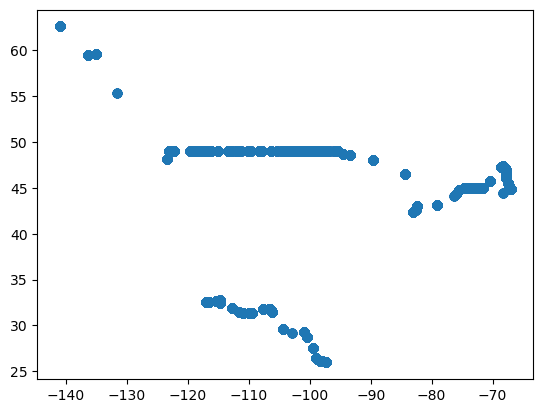

In [97]:
plt.scatter(x=filtered_df['Longitude'], y=filtered_df['Latitude'])
plt.show()

In [99]:
filtered_df.columns.tolist()

['Port Name',
 'State',
 'Port Code',
 'Border',
 'Date',
 'Measure',
 'Value',
 'Latitude',
 'Longitude',
 'Point',
 'Year']

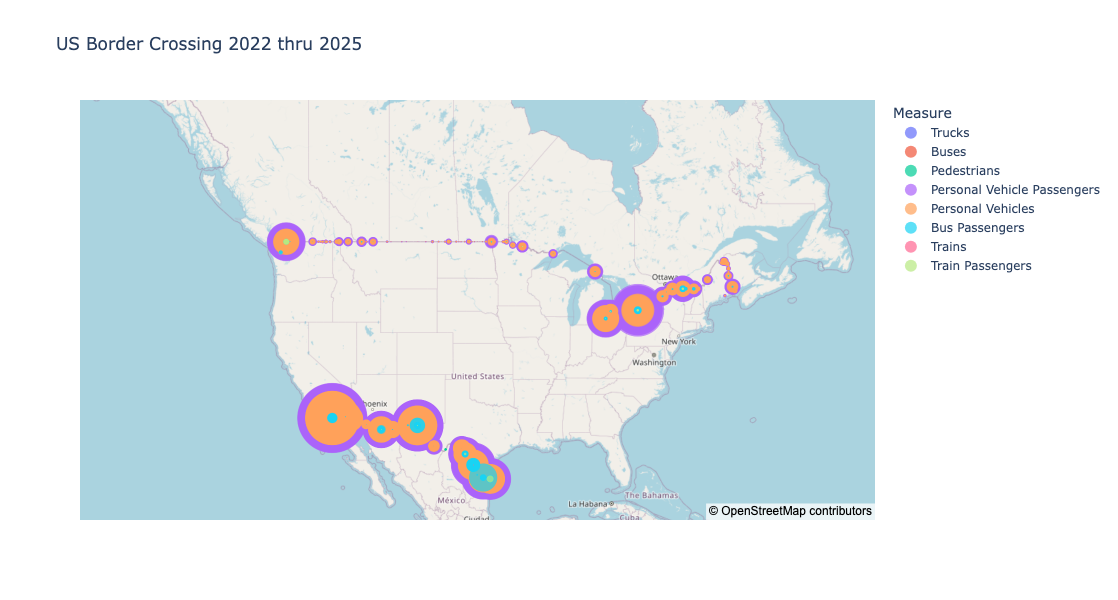

In [101]:
px.scatter_mapbox(filtered_df, lat='Latitude',
                  lon='Longitude',
                  mapbox_style='open-street-map',
                  width = 1200,
                  height = 600,
                  zoom = 2.5,
                  color = 'Measure',
                  size = 'Value',
                  size_max = 50,
                  title='US Border Crossing 2022 thru 2025'
                 )

In [103]:
groupby_year = filtered_df.groupby(['Year','Measure'])['Value'].sum().unstack(level='Year')
groupby_year

Year,2022,2023,2024,2025
Measure,,,,
Bus Passengers,2313785,3412067,3288966,877843
Buses,110402,167053,182876,54223
Pedestrians,36071311,39637634,41036476,13519567
Personal Vehicle Passengers,155366112,175546634,183133011,53621407
Personal Vehicles,87509943,96499996,99448048,29962822
Train Passengers,49224,250871,319327,55379
Trains,31690,31504,32307,10618
Trucks,12751628,12882715,13167757,4330960
